In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import scipy

# build graph

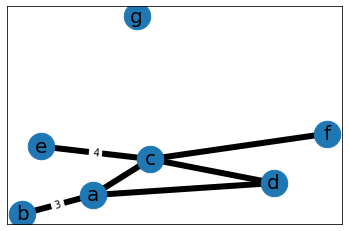

In [2]:
G = nx.Graph()

G.add_edge("a", "b", weight=3)
G.add_edge("a", "c")
G.add_edge("c", "d")
G.add_edge("c", "e", weight=4)
G.add_edge("c", "f")
G.add_edge("a", "d")
G.add_node("g")

pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=G.edges, width=6)

# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels);

In [3]:
# nx.google_matrix

nodelist = list(G)
# to array
M = nx.to_numpy_array(G, nodelist=nodelist, weight=None)
# M = nx.to_numpy_array(G, nodelist=nodelist, weight="weight")
print(M)
N = len(G)
# calc teleport
p = np.repeat(1.0 / N, N)
dangling_weights = p

dangling_nodes = np.where(M.sum(axis=1) == 0)[0]
for node in dangling_nodes:
    M[node] = dangling_weights
M /= M.sum(axis=1).reshape(-1, 1)  # Normalize rows to sum to 1

alpha = 0.5
googleM = alpha * M + (1 - alpha) * p

pd.DataFrame(googleM)

[[0. 1. 1. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 1. 1. 0.]
 [1. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


,0,1,2,3,4,5,6
0,0.071429,0.238095,0.238095,0.238095,0.071429,0.071429,0.071429
1,0.571429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429
2,0.196429,0.071429,0.071429,0.196429,0.196429,0.196429,0.071429
3,0.321429,0.071429,0.321429,0.071429,0.071429,0.071429,0.071429
4,0.071429,0.071429,0.571429,0.071429,0.071429,0.071429,0.071429
5,0.071429,0.071429,0.571429,0.071429,0.071429,0.071429,0.071429
6,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857


In [31]:
# nx.pagerank_scipy

nodelist = list(G)
# to array
M = nx.to_scipy_sparse_matrix(G, nodelist=nodelist, weight=None, dtype="float")
S = np.array(M.sum(axis=1)).flatten()
S[S != 0] = 1.0 / S[S != 0]
Q = scipy.sparse.spdiags(S.T, 0, *M.shape, format='csr')
M = Q * M
p = np.repeat(1.0 / N, N)
dangling_weights = p
is_dangling = scipy.where(S == 0)[0]

# power iteration: make up to max_iter iterations
x = scipy.repeat(1.0 / N, N) # initial vector
# for _ in range(max_iter):
xlast = x
x = alpha * (x * M + sum(x[is_dangling]) * dangling_weights) + \
    (1 - alpha) * p
    # check convergence, l1 norm
#     err = scipy.absolute(x - xlast).sum()
#     if err < N * tol:
#         return dict(zip(nodelist, map(float, x)))

/Users/yohei/Documents/keyphrase_extraction/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: scipy.where is deprecated and will be removed in SciPy 2.0.0, use numpy.where instead
  if sys.path[0] == '':
/Users/yohei/Documents/keyphrase_extraction/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: scipy.repeat is deprecated and will be removed in SciPy 2.0.0, use numpy.repeat instead
  from ipykernel import kernelapp as app


In [33]:
x.shape

(7,)

In [36]:
M.shape

(7, 7)

In [38]:
np.dot(x, M.toarray())

array([0.23809524, 0.06887755, 0.3295068 , 0.13988095, 0.0710034 ,
       0.0710034 , 0.        ])

In [32]:
x * M

array([0.23809524, 0.06887755, 0.3295068 , 0.13988095, 0.0710034 ,
       0.0710034 , 0.        ])

In [29]:
p = np.repeat(1.0 / N, N)
dangling_weights = p

array([0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
       0.14285714, 0.14285714])

In [16]:
F = S.copy()
F[F!=0] = 1 / F[F!=0]
F

array([0, 1, 0, 0, 1, 1, 0])

In [5]:
H = F.copy()
H[H != 0] = 1.0 / H[H != 0]
H

array([0, 1, 0, 0, 1, 1, 0])

In [6]:
1.0 / F[F != 0]

array([0.33333333, 1.        , 0.25      , 0.5       , 1.        ,
       1.        ])